In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load GDELT dataset
gdelt_df = pd.read_csv("./pi2_datasets/all_event_20150201_20240919_v1.csv", sep=',',low_memory=False)

# Load market index dataset
market_index_df = pd.read_csv("./pi2_datasets/market_index_fossil_fuels_20150201_20240919_v1.csv")

# fossil fuel index market performance (2015-2024)


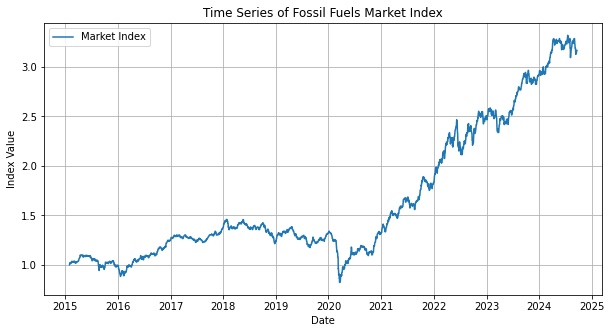

In [28]:
# Convert 'Date' column to datetime format for the market index dataset
market_index_df['Date'] = pd.to_datetime(market_index_df['Date'])

plt.figure(figsize=(10, 5))
plt.plot(market_index_df['Date'], market_index_df['Indice'], label='Market Index')
plt.title('Time Series of Fossil Fuels Market Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

# Event codes analysis

The CAMEO (Conflict and Mediation Event Observations) system, used widely in the GDELT (Global Database of Events, Language, and Tone) Project, is a method for categorizing and coding political events across the globe, especially in terms of their type, context, and actors involved. This system provides a structured way to analyze international interactions, ranging from cooperative endeavors to conflictive actions.

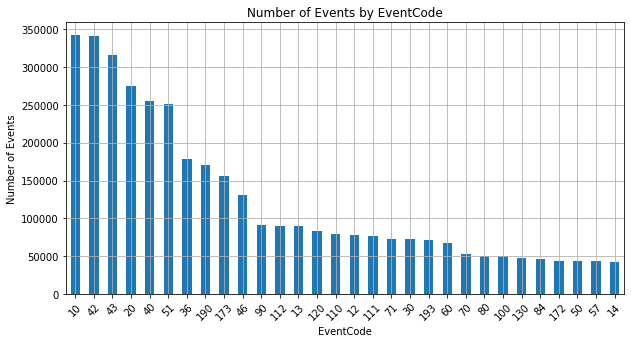

In [29]:

event_code_counts = gdelt_df['EventCode'].value_counts()

plt.figure(figsize=(10, 5))
event_code_counts.head(30).plot(kind='bar')
plt.title("Number of Events by EventCode")
plt.ylabel("Number of Events")
plt.xlabel("EventCode")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

EventCodes are the most specific level within the CAMEO coding system. They describe actions in the most detailed way. Each EventCode is a four-digit number, where the first two digits correspond to the EventRootCode, and the subsequent digit(s) provide further specificity. For example, an EventCode of 0731 would indicate a specific type of aid delivery under the broader category of "Provide aid." These codes allow analysts to precisely categorize and analyze the exact nature of an event or interaction between actors.

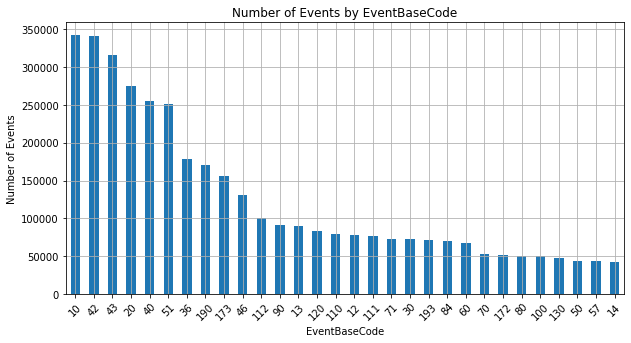

In [30]:

event_base_code_counts = gdelt_df['EventBaseCode'].value_counts()


plt.figure(figsize=(10, 5))
event_base_code_counts.head(30).plot(kind='bar')
plt.title("Number of Events by EventBaseCode")
plt.ylabel("Number of Events")
plt.xlabel("EventBaseCode")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

EventBaseCodes are the middle layer of granularity. They are typically derived from the first three digits of the EventCodes and represent a less specific category of action than the full EventCode. For example, the EventBaseCode 073 covers all activities related to providing aid, not differentiating between the types of aid like food, financial, or military assistance. This allows for analysis at a slightly broader level, useful for examining general trends or patterns without diving into minute details.

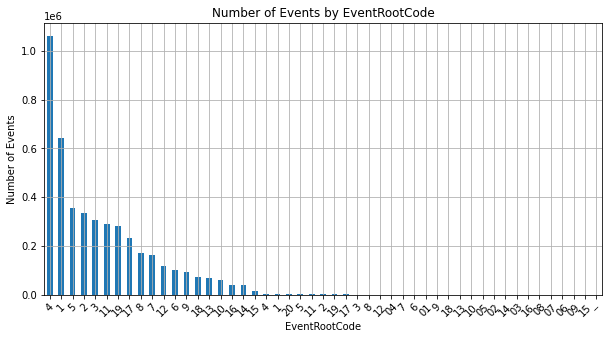

In [31]:

event_root_code_counts = gdelt_df['EventRootCode'].value_counts()


plt.figure(figsize=(10, 5))
event_root_code_counts.plot(kind='bar')
plt.title("Number of Events by EventRootCode")
plt.ylabel("Number of Events")
plt.xlabel("EventRootCode")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

EventRootCode is the highest level of abstraction in the CAMEO event coding system, often represented by the first two digits of the EventCode. This code categorizes events into broad types of political interactions, such as verbal cooperation, material cooperation, verbal conflict, and material conflict. For instance, any EventCode starting with 01 to 04 falls under verbal cooperation, which includes making public statements, appealing, and expressing intentions to cooperate. EventRootCodes are crucial for broad trend analysis, offering a macro view of the nature of interactions between actors over time.

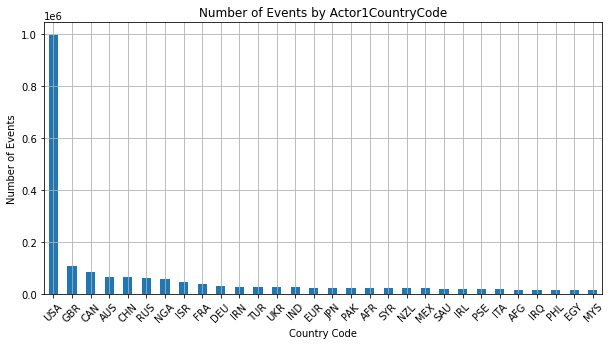

In [33]:

actor1_country_counts = gdelt_df['Actor1CountryCode'].value_counts()


plt.figure(figsize=(10, 5))
actor1_country_counts.head(30).plot(kind='bar')
plt.title("Number of Events by Actor1CountryCode")
plt.ylabel("Number of Events")
plt.xlabel("Country Code")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

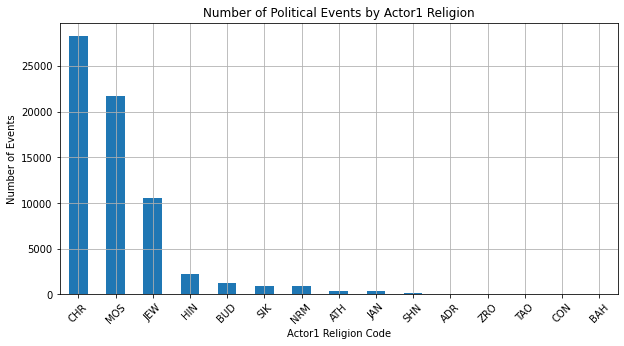

In [34]:
religion_event_counts = gdelt_df['Actor1Religion1Code'].value_counts()

plt.figure(figsize=(10, 5))  
religion_event_counts.plot(kind='bar')
plt.title('Number of Political Events by Actor1 Religion')
plt.xlabel('Actor1 Religion Code')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

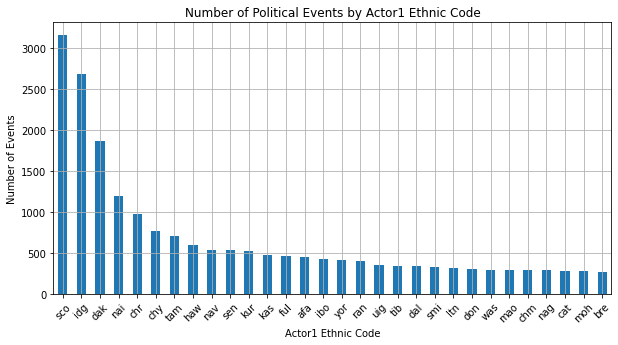

In [35]:
ethnic_event_counts = gdelt_df['Actor1EthnicCode'].value_counts()

plt.figure(figsize=(10, 5))  
ethnic_event_counts.head(30).plot(kind='bar')  
plt.title('Number of Political Events by Actor1 Ethnic Code')
plt.xlabel('Actor1 Ethnic Code')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()


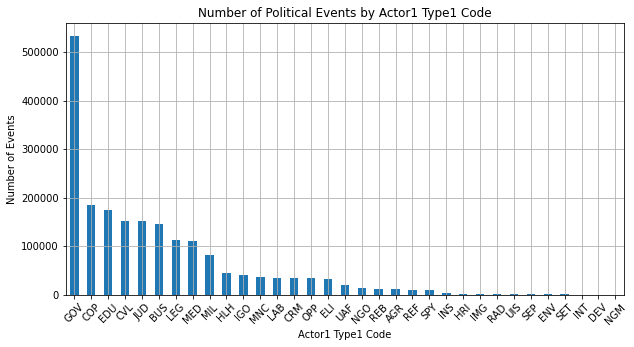

In [36]:
type_event_counts = gdelt_df['Actor1Type1Code'].value_counts()

plt.figure(figsize=(10, 5))  
type_event_counts.plot(kind='bar')  
plt.title('Number of Political Events by Actor1 Type1 Code')
plt.xlabel('Actor1 Type1 Code')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()


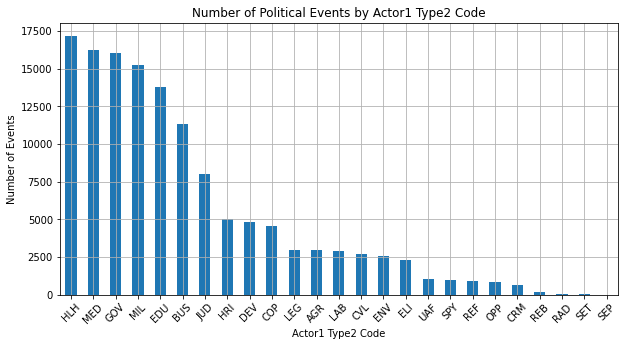

In [37]:
type2_event_counts = gdelt_df['Actor1Type2Code'].value_counts()

plt.figure(figsize=(10, 5)) 
type2_event_counts.plot(kind='bar') 
plt.title('Number of Political Events by Actor1 Type2 Code')
plt.xlabel('Actor1 Type2 Code')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()

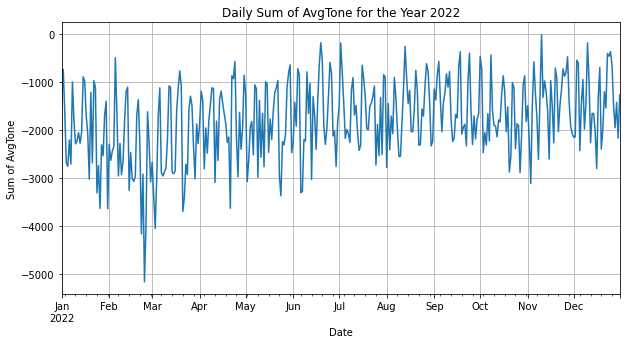

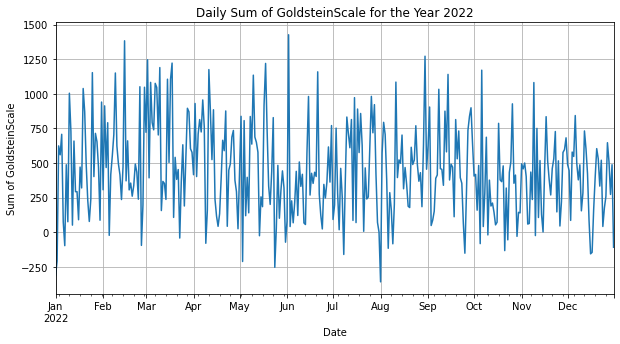

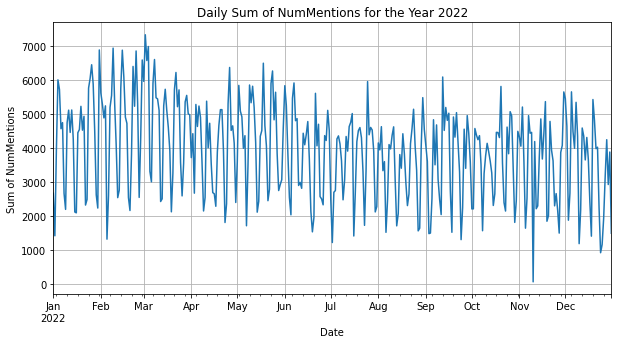

In [38]:
gdelt_df['Date'] = pd.to_datetime(gdelt_df['Day'].astype(str), format='%Y%m%d')

year_filter = 2022
filtered_df = gdelt_df[gdelt_df['Date'].dt.year == year_filter]

daily_tone_sum = filtered_df.groupby('Date')['AvgTone'].sum()

plt.figure(figsize=(10, 5)) 
daily_tone_sum.plot()
plt.title(f'Daily Sum of AvgTone for the Year {year_filter}')
plt.xlabel('Date')
plt.ylabel('Sum of AvgTone')
plt.grid(True)
plt.show()


daily_goldstein_sum = filtered_df.groupby('Date')['GoldsteinScale'].sum()

plt.figure(figsize=(10, 5))  
daily_goldstein_sum.plot()
plt.title(f'Daily Sum of GoldsteinScale for the Year {year_filter}')
plt.xlabel('Date')
plt.ylabel('Sum of GoldsteinScale')
plt.grid(True)
plt.show()

daily_mentions_sum = filtered_df.groupby('Date')['NumMentions'].sum()

plt.figure(figsize=(10, 5))  
daily_mentions_sum.plot()
plt.title(f'Daily Sum of NumMentions for the Year {year_filter}')
plt.xlabel('Date')
plt.ylabel('Sum of NumMentions')
plt.grid(True)
plt.show()

The AvgTone variable represents the average "tone" of all the news articles mentioning a particular event. It is a sentiment score that reflects the overall emotional tone of the media coverage about the event.
The scale ranges from -100 (extremely negative tone) to +100 (extremely positive tone).

The GoldsteinScale is a numeric measure that estimates the potential impact of an event on the stability of a country. It was developed by Joshua Goldstein as part of conflict research.
The scale ranges from -10 to +10, where:
Negative values indicate that the event is likely to have a destabilizing effect (e.g., protests, military attacks).
Positive values indicate that the event is likely to have a stabilizing effect (e.g., peace talks, international aid)